##  Digital Quantum Simulations of Time Evolution - Simulating the Dicke Model
---
### Modules and some comments
Take a look at the file `classical_evolution` in the folder `tools`.

In [1]:
# Ignore: things to make plots pretty on my computer 
from pkg_resources import working_set

if 'jupyterthemes' in ["%s" % package.key for package in working_set]:
    from jupyterthemes import jtplot
    jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = True)

In [2]:
# Important: the functions below are defined in the file `classical_evolution` in the folder
# `tools`
from tools.classical_evolution import U, H, state_probability, define_state

In [8]:
# Usual suspects
from numpy import linspace, pi
from qiskit import QuantumCircuit, Aer
from qiskit.opflow import CircuitSampler, StateFn, I, Z
from qiskit.opflow.expectations import PauliExpectation
from matplotlib.pyplot import plot, xlabel, ylabel, title, grid, show

### Classical simulation with $N=2$
It is already generalizable to $N>2$ and, hoping that it is more or less correct, you can already try to see what happens by changing the `spins` variable.

In [9]:
# Checking if the hamiltonian is correct
spins = 2 # Number of 2-level systems
hamiltonian = H(spins = spins, frequency = 1, coupling = 3) # In `tools.classical_simulation`
print(hamiltonian)

1.0 * IZ
+ 1.0 * ZI
- 6.0 * XX


In [10]:
# Classical simulation
times = linspace(0, pi, 100) # Time discretization
initial_state = define_state([0 for _ in range(spins)]) # Ground state: all spins down
state = define_state([1 for _ in range(spins)]) # All spins up
classical = [state_probability(hamiltonian, time, initial_state, state) for time in times]

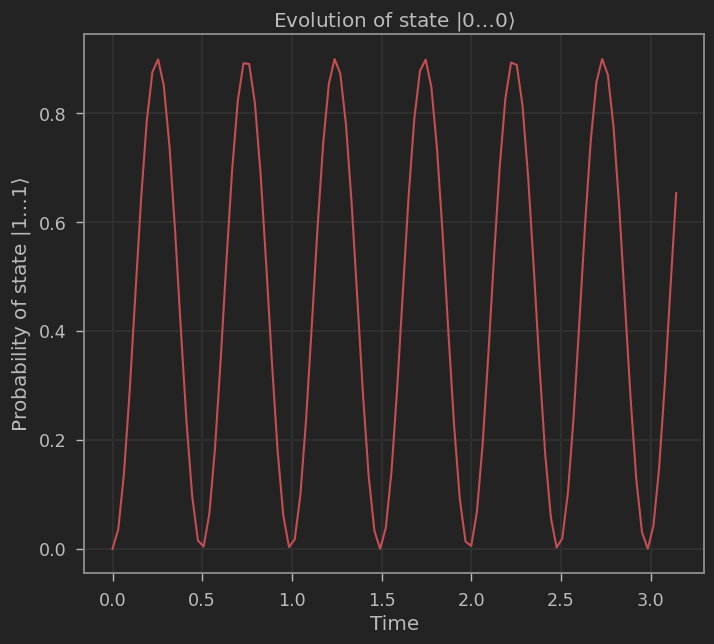

In [11]:
plot(times, classical, '-r')
xlabel('Time')
ylabel(r'Probability of state $|1\dots1\rangle$')
title(r'Evolution of state $|0\dots0\rangle$')
show()

### Quantum simulation with $N=2$
Work in progress.

In [12]:
backend = Aer.get_backend("statevector_simulator")
expectation = PauliExpectation() 
sampler = CircuitSampler(backend)


projector = StateFn(((I - Z) ^ (I - Z) / 4), is_measurement = True)
probabilities = []

for time in times:
    circuit = QuantumCircuit(2)
    circuit.rz(time, 0)
    circuit.rz(time, 1)
    circuit.rxx(time, 0, 1)
    circuit.draw('mpl')

    expectation_value = expectation.convert(projector @ StateFn(circuit))
    sample = sampler.convert(expectation_value)
    probabilities.append(sample.eval().real)

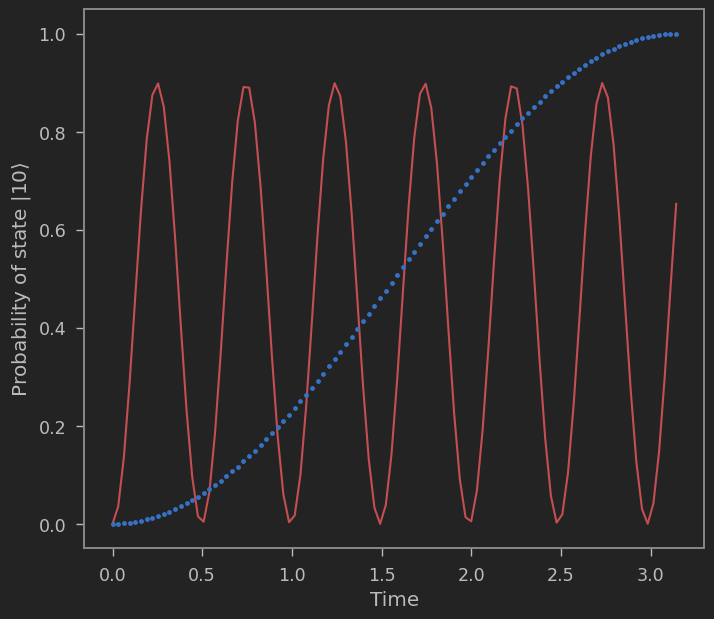

In [13]:
# Now plot the comparison
plot(times, classical, '-r', label = 'Exact')
plot(times, probabilities, '.b', label = 'Trotter')
xlabel('Time')
ylabel(r'Probability of state $|10\rangle$')

grid()
show()

In [ ]:
'''
# We need a backend (what will actually compute the expectation value)
n_shots     = 1000
backend     = QasmSimulator(shots = n_shots) # We use the `QasmSimulator` instead of `Aer` because we also
                                             # want to see the effect of the noise
            # Aer.get_backend('statevector_simulator')
# What type of expectation value do we want?
expectation = PauliExpectation() # the expectation value is a Pauli matrix
# How do we sample the bitstrings from the circuit?
sampler     = CircuitSampler(backend) 

## Create the observable
ob = StateFn(X ^ I, is_measurement = True) # Remember that the order is from right to left 
                                           # (I on 0 and X on 1)

# Compose the observable with the quantum circuit you want to measure
qc_meas = QuantumCircuit(2)
qc_meas.h(0)
qc_meas.cx(0,1)
qc_meas.cx(1,0)
qc_meas.cx(0,1)

display(qc_meas.draw())
measured_qc  = expectation.convert(ob @ StateFn(qc_meas)) # We convert the measure that we defined w. r. t.
                                                          # the measure of the circuit
'''